In [5]:
# from ucimlrepo import fetch_ucirepo 
  
# # fetch dataset 
# adult = fetch_ucirepo(id=2) 
  
# # data (as pandas dataframes) 
# X = adult.data.features 
# y = adult.data.targets 
  
# # metadata 
# print(adult.metadata) 
  
# # variable information 
# print(adult.variables) 


## Start from here

In [6]:
# !wget https://archive.ics.uci.edu/static/public/2/adult.zip
# !mkdir "../datasets/adults"
# !mkdir -p "../datasets/preprocessed_data/"
# !unzip adult.zip -d "../datasets/adults"

--2024-10-12 01:54:46--  https://archive.ics.uci.edu/static/public/2/adult.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: 'adult.zip'

     0K .......... .......... .......... .......... ..........  838K
    50K .......... .......... .......... .......... ..........  814K
   100K .......... .......... .......... .......... .......... 1.00M
   150K .......... .......... .......... .......... ..........  926K
   200K .......... .......... .......... .......... .......... 1.19M
   250K .......... .......... .......... .......... .......... 1.74M
   300K .......... .......... .......... .......... .......... 1.22M
   350K .......... .......... .......... .......... .......... 1.67M
   400K .......... .......... .......... .......... .......... 1.38M
   450K .......... .......... .......... ........

Archive:  adult.zip
  inflating: ../datasets/adults/Index  
  inflating: ../datasets/adults/adult.data  
  inflating: ../datasets/adults/adult.names  
  inflating: ../datasets/adults/adult.test  
  inflating: ../datasets/adults/old.adult.names  


In [7]:
import numpy as np
import csv
from dataset_utils import index_sizes_from_event_dict,get_cumulative_index_sizes


N = 32561
D = 15
CTS_VARS = [1,3, 11,12,13]
CSV_FILENAME = '../datasets/adults/adult.data'
EXPORT_FILENAME = "../datasets/preprocessed_data/adults_"

I_ks = (2, 74, 10, 28523, 16, 16, 7, 16, 6, 5, 2, 123, 99, 96, 43)
print('I_ks    \t',I_ks)
cum_I_ks = get_cumulative_index_sizes(I_ks)
print('cum_I_ks \t',cum_I_ks)



event_dictionary = {
    0 : ['<=50K', '>50K',],
    1 : [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90],
    2 : ['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked', None],

    4 : ['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
    5 : list(range(1,16+1)),
    6 : ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed'],
    7 : ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct', 'Tech-support', '?', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv', None],
    8 : ['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried', 'Other-relative'],
    9 : ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],
    10 : ['Male', 'Female'],
    11 : [2174, 0, 14084, 5178, 5013, 2407, 14344, 15024, 7688, 34095, 4064, 4386, 7298, 1409, 3674, 1055, 3464, 2050, 2176, 594, 20051, 6849, 4101, 1111, 8614, 3411, 2597, 25236, 4650, 9386, 2463, 3103, 10605, 2964, 3325, 2580, 3471, 4865, 99999, 6514, 1471, 2329, 2105, 2885, 25124, 10520, 2202, 2961, 27828, 6767, 2228, 1506, 13550, 2635, 5556, 4787, 3781, 3137, 3818, 3942, 914, 401, 2829, 2977, 4934, 2062, 2354, 5455, 15020, 1424, 3273, 22040, 4416, 3908, 10566, 991, 4931, 1086, 7430, 6497, 114, 7896, 2346, 3418, 3432, 2907, 1151, 2414, 2290, 15831, 41310, 4508, 2538, 3456, 6418, 1848, 3887, 5721, 9562, 1455, 2036, 1831, 11678, 2936, 2993, 7443, 6360, 1797, 1173, 4687, 6723, 2009, 6097, 2653, 1639, 18481, 7978, 2387, 5060, 1264, 7262, 1731, 6612],
    12 : [0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816, 1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721, 2051, 2377, 1669, 2352, 1672, 653, 2392, 1504, 2001, 1590, 1651, 1628, 1848, 1740, 2002, 1579, 2258, 1602, 419, 2547, 2174, 2205, 1726, 2444, 1138, 2238, 625, 213, 1539, 880, 1668, 1092, 1594, 3004, 2231, 1844, 810, 2824, 2559, 2057, 1974, 974, 2149, 1825, 1735, 1258, 2129, 2603, 2282, 323, 4356, 2246, 1617, 1648, 2489, 3770, 1755, 3683, 2267, 2080, 2457, 155, 3900, 2201, 1944, 2467, 2163, 2754, 2472, 1411, 1429, 3175, 1510, 1870, 1911, 2465, 1421],
    13 : [40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55, 48, 58, 32, 70, 2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65, 1, 10, 34, 75, 98, 33, 54, 8, 6, 64, 19, 18, 72, 5, 9, 47, 37, 21, 26, 14, 4, 59, 7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84, 3, 17, 68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67, 82, 86, 91, 81, 76, 92, 61, 74, 95, 79, 69],
    14 : ['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico', 'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia', 'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal', 'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala', 'China', 'Japan', 'Yugoslavia', 'Peru', 'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago', 'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary', 'Holand-Netherlands', None],
}

I_ks    	 (2, 74, 10, 28523, 16, 16, 7, 16, 6, 5, 2, 123, 99, 96, 43)
cum_I_ks 	 [0, 2, 76, 86, 28609, 28625, 28641, 28648, 28664, 28670, 28675, 28677, 28800, 28899, 28995, 29038]


In [8]:





ONEHOT_D = sum(list(I_ks))
print(I_ks)
print(ONEHOT_D)
X_arr = np.zeros( (N,ONEHOT_D), dtype=int )

import csv
with open(CSV_FILENAME, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',') #, quotechar='|')
    n=0
    for row in spamreader:
        if n<N: #white space at the end of the file
            # cum_n = 2
            # for d in range(1,D):
            cum_n = 0
            for d in range(D):
                if d>0:
                    value = row[d-1].strip()
                else:
                    value = row[-1].strip()
    
                if d in CTS_VARS or d==5:
                    value = int(value)
    
                if d!=3:
                    if value not in event_dictionary[d]:
                        print('\t',d)
                    v_id = event_dictionary[d].index(value)
                    
                    X_arr[n,cum_n+v_id] = 1
                else:
                    X_arr[n,cum_n+0] = value
                cum_n += I_ks[d]

        
        pass
        # print(', '.join(row))
        n+=1

(2, 74, 10, 28523, 16, 16, 7, 16, 6, 5, 2, 123, 99, 96, 43)
29038


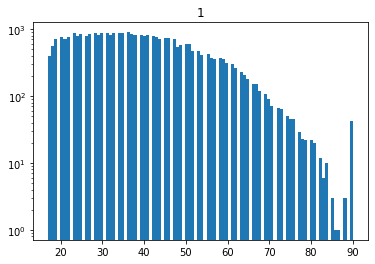

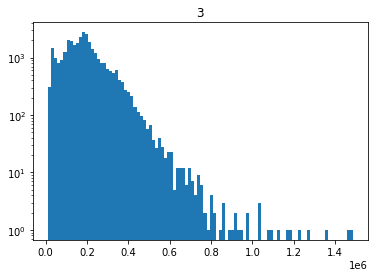

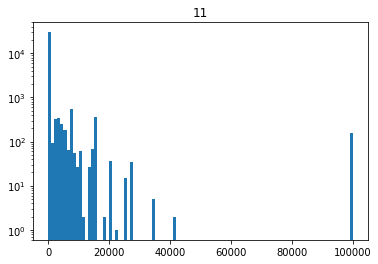

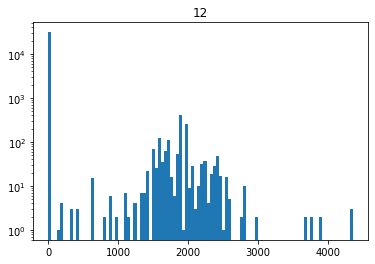

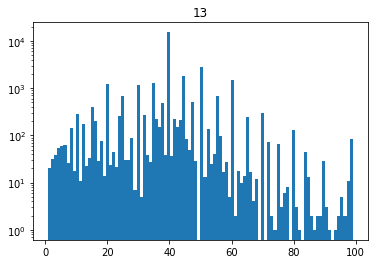

In [9]:
cts_variables = [1,3, 11,12,13]
import matplotlib.pyplot as plt

for i in cts_variables:
    cum_I_i = cum_I_ks[i]
    I_i = I_ks[i]
    plt.title(str(i))
    if i!=3:
        #plt.hist(X_arr[:,cum_I_i:cum_I_i+I_i])
        plt.hist(np.matmul(X_arr[:,cum_I_i:cum_I_i+I_i],event_dictionary[i]),bins=100)
    else:
        # plt.hist(X_arr[:,cum_I_i])
        # plt.scatter(np.arange(N),X_arr[:,cum_I_i])
        plt.hist(X_arr[:,cum_I_i],bins=100)
    plt.yscale('log')
    plt.show()

### Choice of discretization of continuous features

In [10]:
bins_dictionary = {
    1 : [14.5, 19.5, 24.5, 29.5, 34.5, 39.5, 44.5, 49.5, 54.5, 59.5, 64.5, 69.5,79.5,89.5,99.5],
    3 : [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 1500000],
    
    11 : [-0.5,0.5,1000.5,3000.5,10000.5,   30000.5, 100000.5],
    12 : [-0.5,1000.5,1500.5,2000.5,2500.5,5000.5],
    13 : [0.5, 10.5, 20.5,30.5, 35.5, 40.5, 45.5, 50.5, 60.5, 80.5,100.5],
}
cts_event_dictionary = {
    1 : ['<20', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-79', '80-89', '90+'],
    3 : ['<50K', '50K-100K', '100K-150K', '150K-200K', '200K-250K', '250K-300K', '300K-350K', '350K-400K', '400K+'],

    11 : ['0', '<1K', '1K-3K', '3K-10K', '10K-30K', '30K+'],
    12 : ['1K', '1K-1.5K', '1.5K-2K', '2K-2.5K', '2.5K-5K'],
    13 : ['0-10', '10-20', '20-30', '30-35', '35-40', '40-45', '45-50', '50-60', '60-80', '80-100'],
}

1


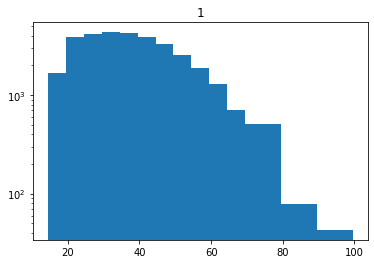

3


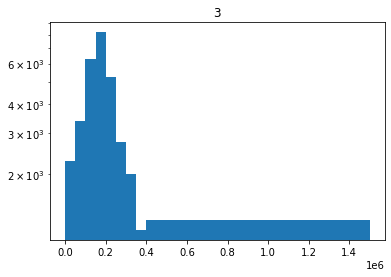

11


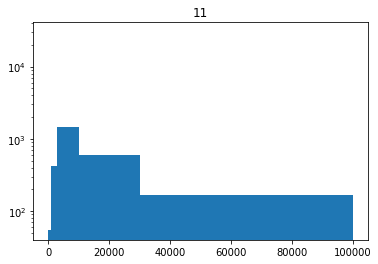

12


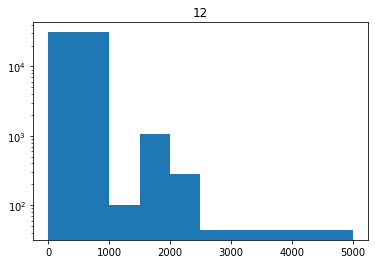

13


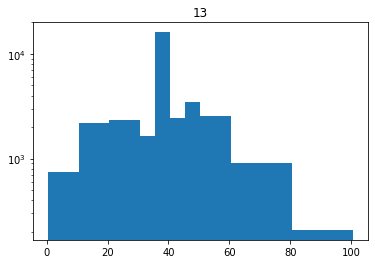

In [11]:
import matplotlib.pyplot as plt

for i in CTS_VARS:
    print(i)
    cum_I_i = cum_I_ks[i]
    I_i = I_ks[i]
    plt.title(str(i))
    if i!=3:
        #plt.hist(X_arr[:,cum_I_i:cum_I_i+I_i])
        plt.hist(np.matmul(X_arr[:,cum_I_i:cum_I_i+I_i],event_dictionary[i]),bins=bins_dictionary[i])
    else:
        # plt.hist(X_arr[:,cum_I_i])
        # plt.scatter(np.arange(N),X_arr[:,cum_I_i])
        plt.hist(X_arr[:,cum_I_i],bins=bins_dictionary[i])
    plt.yscale('log')
    plt.show()

# final clean version with no duplicate education

In [12]:
event_dictionary = {
    0 : ['<=50K', '>50K'],
    1 : ['<20', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-79', '80-89', '90+'],
    2 : ['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked', None],
    3 : ['<50K', '50K-100K', '100K-150K', '150K-200K', '200K-250K', '250K-300K', '300K-350K', '350K-400K', '400K+'],
    4 : ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate'],

    #DUPLICATED FEATURE AS A NUMERICAL VALUE
    5 : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    
    6 : ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed'],
    7 : ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct', 'Tech-support', '?', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv', None],
    8 : ['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried', 'Other-relative'],
    9 : ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],
    10 : ['Male', 'Female'],
    11 : ['0', '<1K', '1K-3K', '3K-10K', '10K-30K', '30K+'],
    12 : ['1K', '1K-1.5K', '1.5K-2K', '2K-2.5K', '2.5K-5K'],
    13 : ['0-10', '10-20', '20-30', '30-35', '35-40', '40-45', '45-50', '50-60', '60-80', '80-100'],
    14 : ['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico', 'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia', 'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal', 'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala', 'China', 'Japan', 'Yugoslavia', 'Peru', 'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago', 'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary', 'Holand-Netherlands', None],
}

readable_label_dict = {
    0 : "income",
    1 : "age",
    2 : "workclass",
    3 : "fnlwgt",
    4 : "education",
    5 : "education-num",
    6 : "marital-status",
    7 : "occupation",
    8 : "relationship",
    9 : "race",
    10 : "sex",
    11 : "capital-gain",
    12 : "capital-loss",
    13 : "hours-per-week",
    14 : "native-country",
}

bins_dictionary = {
    1 : [14.5, 19.5, 24.5, 29.5, 34.5, 39.5, 44.5, 49.5, 54.5, 59.5, 64.5, 69.5,79.5,89.5,99.5],
    3 : [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 1500000],
    
    11 : [-0.5,0.5,1000.5,3000.5,10000.5,   30000.5, 100000.5],
    12 : [-0.5,1000.5,1500.5,2000.5,2500.5,5000.5],
    13 : [0.5, 10.5, 20.5,30.5, 35.5, 40.5, 45.5, 50.5, 60.5, 80.5,100.5],
}
D=15


In [13]:

I_ks = []
for d in range(D):
    if d in bins_dictionary:
        I_ks.append( len(bins_dictionary[d])-1 )
        assert len(bins_dictionary[d]) == len(event_dictionary[d])+1, 'mislabeled readable labels @ '+str(d) +\
                                                                        '  ('+str(len(bins_dictionary[d])-1)+','+str(len(event_dictionary[d]))+')'
    else:
        I_ks.append( len(event_dictionary[d]) )
I_ks=tuple(I_ks)
print('I_ks    \t',I_ks)
print("D",len(I_ks),"\t\tonehot D",sum(I_ks))

cum_I_ks = get_cumulative_index_sizes(I_ks)
print('cum_I_ks \t',cum_I_ks)


I_ks    	 (2, 14, 10, 9, 16, 16, 7, 16, 6, 5, 2, 6, 5, 10, 43)
D 15 		onehot D 167
cum_I_ks 	 [0, 2, 16, 26, 35, 51, 67, 74, 90, 96, 101, 103, 109, 114, 124, 167]


In [14]:
import numpy as np
N = 32561


ONEHOT_D = sum(list(I_ks))
print(I_ks)
print(ONEHOT_D)
X_arr = np.zeros( (N,ONEHOT_D), dtype=int )

import csv
with open(CSV_FILENAME, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',') #, quotechar='|')
    n=0
    for row in spamreader:
        if n<N: #white space at the end of the file
            cum_n = 0
            for d in range(D):
                if d>0:
                    value = row[d-1].strip()
                else:
                    value = row[-1].strip()

                v_id = -1
                if d in CTS_VARS:
                    value = int(value)

                    v_id = -1
                    bins_d = bins_dictionary[d]
                    for bb,b in enumerate(bins_d):
                        if value>b:
                            v_id = bb

                else:
                    if d==5:
                        value = int(value)
                    if value not in event_dictionary[d]:
                        print('FAILURE\t',d)
                    v_id = event_dictionary[d].index(value)
   
                X_arr[n,cum_n+v_id] = 1
                cum_n += I_ks[d]
        pass
        n+=1
print(n)


(2, 14, 10, 9, 16, 16, 7, 16, 6, 5, 2, 6, 5, 10, 43)
167
32562


### Remove the duplicate feature: education (4) and education-numerical (5)

In [15]:
#REMOVING FEATURE #5

if len(I_ks)==15:
    d_to_remove = 5
    print(I_ks[5],cum_I_ks[5])
    I_5 = I_ks[5]
    cum_I_5 = cum_I_ks[5]

    print('X_arr',X_arr.shape)
    X_arr = np.concatenate([X_arr[:,:cum_I_5],X_arr[:,cum_I_5+I_5:]],axis=-1)
    print('X_arr',X_arr.shape)

    for d in range(D):
        if d>5:
            readable_label_dict[d-1] = readable_label_dict[d]
            event_dictionary[d-1]    = event_dictionary[d]
    I_ks=list(I_ks)
    I_ks.pop(5)
    I_ks=tuple(I_ks)
    D=14
    del readable_label_dict[14]
    del event_dictionary[14]
    
    print("D",len(I_ks),"\t\tonehot D",sum(I_ks))
    print('I_ks    \t',I_ks)
    cum_I_ks = get_cumulative_index_sizes(I_ks)
    print('cum_I_ks \t',cum_I_ks)
else:
    raise Exception("be careful not to run this cell multiple times")

16 51
X_arr (32561, 167)
X_arr (32561, 151)
D 14 		onehot D 151
I_ks    	 (2, 14, 10, 9, 16, 7, 16, 6, 5, 2, 6, 5, 10, 43)
cum_I_ks 	 [0, 2, 16, 26, 35, 51, 58, 74, 80, 85, 87, 93, 98, 108, 151]


In [16]:
for thing in (readable_label_dict):
    print(thing,'\t',readable_label_dict[thing])
print()
print()
for thing in (event_dictionary):
    print(thing,'\t',event_dictionary[thing])


0 	 income
1 	 age
2 	 workclass
3 	 fnlwgt
4 	 education
5 	 marital-status
6 	 occupation
7 	 relationship
8 	 race
9 	 sex
10 	 capital-gain
11 	 capital-loss
12 	 hours-per-week
13 	 native-country


0 	 ['<=50K', '>50K']
1 	 ['<20', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-79', '80-89', '90+']
2 	 ['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked', None]
3 	 ['<50K', '50K-100K', '100K-150K', '150K-200K', '200K-250K', '250K-300K', '300K-350K', '350K-400K', '400K+']
4 	 ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
5 	 ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed']
6 	 ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-

In [17]:
from dataset_utils import save_onehotified_dataset_to_numpy

trn_X,tst_X = save_onehotified_dataset_to_numpy(EXPORT_FILENAME,X_arr,N,D,I_ks,cum_I_ks,readable_label_dict,event_dictionary)

## Simplifying the 'nationality (13)' variable in the deduplicated version

In [18]:
print(    ['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico', 'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia', 'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal', 'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala', 'China', 'Japan', 'Yugoslavia', 'Peru', 'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago', 'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary', 'Holand-Netherlands', None] )


['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico', 'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia', 'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal', 'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala', 'China', 'Japan', 'Yugoslavia', 'Peru', 'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago', 'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary', 'Holand-Netherlands', None]


108
43


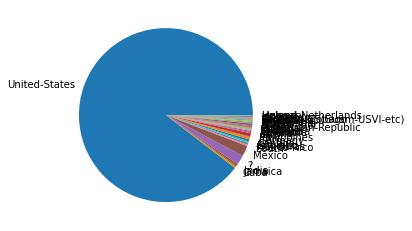

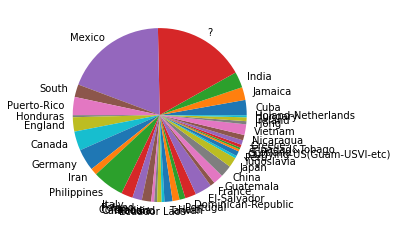

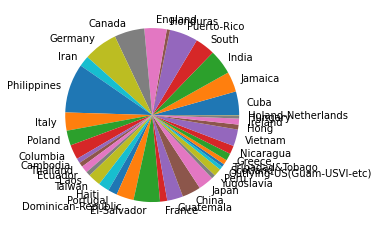

In [19]:
d2 = 13
print(cum_I_ks[d2])
print(I_ks[d2])
xd= np.matmul(X_arr[:,cum_I_ks[d2]:cum_I_ks[d2]+I_ks[d2]],np.arange(I_ks[d2]))
xd= np.sum(X_arr[:,cum_I_ks[d2]:cum_I_ks[d2]+I_ks[d2]],axis=0)
# xd= (X_arr[:,cum_ns[d2]:cum_ns[d2]+I_ks[d2]])
lab= ['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico', 'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia', 'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal', 'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala', 'China', 'Japan', 'Yugoslavia', 'Peru', 'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago', 'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary', 'Holand-Netherlands', None] 
plt.pie(xd, labels=lab)
# plt.pie(xd)#, labels=lab)
plt.show()

plt.pie(xd[1:], labels=lab[1:])
plt.show()

inds = list(range(43))
inds.remove(0)
inds.remove(5);inds.remove(4);
plt.pie(xd[inds], labels=np.array(lab)[inds])
plt.show()


In [20]:
print('country_relabeling_dict = {')
for thing in lab:
    print('\t"'+"{:30s}".format(str(thing)+'"')+' : '+'"xxxx",')
print('}')

country_relabeling_dict = {
	"United-States"                 : "xxxx",
	"Cuba"                          : "xxxx",
	"Jamaica"                       : "xxxx",
	"India"                         : "xxxx",
	"?"                             : "xxxx",
	"Mexico"                        : "xxxx",
	"South"                         : "xxxx",
	"Puerto-Rico"                   : "xxxx",
	"Honduras"                      : "xxxx",
	"England"                       : "xxxx",
	"Canada"                        : "xxxx",
	"Germany"                       : "xxxx",
	"Iran"                          : "xxxx",
	"Philippines"                   : "xxxx",
	"Italy"                         : "xxxx",
	"Poland"                        : "xxxx",
	"Columbia"                      : "xxxx",
	"Cambodia"                      : "xxxx",
	"Thailand"                      : "xxxx",
	"Ecuador"                       : "xxxx",
	"Laos"                          : "xxxx",
	"Taiwan"                        : "xxxx",
	"Haiti"                  

In [21]:
country_relabeling_dict = {
	"United-States"                 : "usa",
	"Cuba"                          : "latAm",
	"Jamaica"                       : "latAm",
	"India"                         : "asia",
	"?"                             : "?",
	"Mexico"                        : "mexico",
	"South"                         : "asia", #presumably south korea
	"Puerto-Rico"                   : "latAm",
	"Honduras"                      : "latAm",
	"England"                       : "uk",   #I guess I will keep (English)
	"Canada"                        : "canada",
	"Germany"                       : "europe",
	"Iran"                          : "asia", #central asia?
    "Philippines"                   : "asia",
	"Italy"                         : "europe",
	"Poland"                        : "europe",
	"Columbia"                      : "latAm",
	"Cambodia"                      : "asia", #southeast asia?
    "Thailand"                      : "asia",
	"Ecuador"                       : "latAm",
	"Laos"                          : "asia",
	"Taiwan"                        : "asia",
	"Haiti"                         : "latAm",
	"Portugal"                      : "europe",
	"Dominican-Republic"            : "latAm",
	"El-Salvador"                   : "latAm",
	"France"                        : "europe",
	"Guatemala"                     : "latAm",
	"China"                         : "asia",
	"Japan"                         : "asia",
	"Yugoslavia"                    : "europe",
	"Peru"                          : "latAm",
	"Outlying-US(Guam-USVI-etc)"    : "latAm",
	"Scotland"                      : "europe",
	"Trinadad&Tobago"               : "latAm",
	"Greece"                        : "europe",
	"Nicaragua"                     : "latAm",
	"Vietnam"                       : "asia",
	"Hong"                          : "asia", #hong kong?
	"Ireland"                       : "europe",
	"Hungary"                       : "europe",
	"Holand-Netherlands"            : "europe",
	"None"                          : "?",
}

In [22]:
uniques = []
for thing in country_relabeling_dict:
    newlabel = country_relabeling_dict[thing]
    if newlabel not in uniques:
        uniques.append(newlabel)

print('uniques',len(uniques))
print(uniques)


country_relabeling_array = np.zeros((43,len(uniques)))
cc=0
for thing in country_relabeling_dict:
    newlabel = country_relabeling_dict[thing]
    uu=uniques.index(newlabel)
    country_relabeling_array[cc,uu] = 1
    cc+=1

print(country_relabeling_array.T)

uniques 8
['usa', 'latAm', 'asia', '?', 'mexico', 'uk', 'canada', 'europe']
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
  1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0.
  0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [23]:
if I_ks[13]==43:
    X_arr_v1 = X_arr[:,:108]
    X_arr_v2 = X_arr[:,108:]
    X_arr_v3 = np.matmul(X_arr_v2,country_relabeling_array)
    X_arr_simpnat = np.concatenate([X_arr_v1,X_arr_v3],axis=-1)
    print('X_arr_simpnat',X_arr_simpnat.shape)

    I_ks=list(I_ks)
    I_ks[13] = 8
    I_ks=tuple(I_ks)
    print('I_ks    \t',I_ks)
    cum_I_ks = get_cumulative_index_sizes(I_ks)
    print('cum_I_ks \t',cum_I_ks)
    readable_label_dict[13] = 'simplified-native-country'
    event_dictionary[13] = uniques

X_arr_simpnat (32561, 116)
I_ks    	 (2, 14, 10, 9, 16, 7, 16, 6, 5, 2, 6, 5, 10, 8)
cum_I_ks 	 [0, 2, 16, 26, 35, 51, 58, 74, 80, 85, 87, 93, 98, 108, 116]


In [24]:
for thing in (readable_label_dict):
    print(thing,'\t',readable_label_dict[thing])
print()
print()
for thing in (event_dictionary):
    print(thing,'\t',event_dictionary[thing])


0 	 income
1 	 age
2 	 workclass
3 	 fnlwgt
4 	 education
5 	 marital-status
6 	 occupation
7 	 relationship
8 	 race
9 	 sex
10 	 capital-gain
11 	 capital-loss
12 	 hours-per-week
13 	 simplified-native-country


0 	 ['<=50K', '>50K']
1 	 ['<20', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-79', '80-89', '90+']
2 	 ['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked', None]
3 	 ['<50K', '50K-100K', '100K-150K', '150K-200K', '200K-250K', '250K-300K', '300K-350K', '350K-400K', '400K+']
4 	 ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
5 	 ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed']
6 	 ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialt

In [25]:

EXPORT_FILENAME_2 = "../datasets/preprocessed_data/adultsV2_"
trn_X,tst_X = save_onehotified_dataset_to_numpy(EXPORT_FILENAME_2,X_arr_simpnat,N,D,I_ks,cum_I_ks,readable_label_dict,event_dictionary)